## Модель ML для прогнозирования смертельного исхода от covid 19.

### Записная книжка включает в себя:
* Импорт данных
* Обработку данных
* Подготовку и Очистку Данных
* Анализ пропущенных Значений
* Визуализацию Данных
* Выбор Функций
* Создание Модели
* Анализ Модели
* Улучшение Модели
* Решение Проблемы Несбалансированного Набора Данных С Недостаточной Выборкой

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Информация о датасете.
### Этот набор данных содержит огромное количество анонимизированной информации о пациентах, включая предварительные условия. Исходный набор данных состоит из 21 уникального признака и 1 048 576 уникальных пациентов. В логических параметрах 1 означает "да", а 2 - "нет". значения 97 и 99 являются недостающими данными.
* sex: пол (женский или мужской).
* age: возраст пациента.
* classification: результаты теста на covid. Значения 1-3 означают, что у пациента был диагностирован covid в разной степени. 4 или выше означает, что пациент не является носителем covid или что тест не дал результатов.
* patient type: тип пациента (госпитализированный или не госпитализированный).
* pneumonia: пневмония (есть ли у пациента воспаление дыхательных путей или нет).
* pregnancy: беременна пациентка или нет.
* diabetes: есть ли у пациента сахарный диабет или нет.
* copd: Указывает, есть ли у пациента хроническая обструктивная болезнь легких или нет.
* asthma: Указывает, есть ли у пациента астма или нет.
* inmsupr: есть ли у пациента иммуносупрессия или нет.
* hypertension: есть ли у пациента гипертония или нет.
* cardiovascular: есть ли у пациента заболевания, связанные с сердцем или кровеносными сосудами.
* renal chronic: есть ли у пациента хронические заболевания почек или нет.
* other disease: есть ли у пациента другие заболевания или нет.
* obesity: страдает ли пациент ожирением или нет.
* tobacco: употребляет ли пациент табак.
* usmer: Указывает, проходил ли пациент лечение в медицинских учреждениях первого, второго или третьего уровня.
* medical unit: тип учреждения Национальной системы здравоохранения, в котором оказывалась медицинская помощь.
* intubed: был ли пациент подключен к аппарату искусственной вентиляции легких.
* icu: указывает, был ли пациент помещен в отделение интенсивной терапии.
* death: указывает, умер пациент или выздоровел.

# Обзорный набор данных

In [160]:
df = pd.read_csv("Covid Data.csv")
print("Размер датасета :",df.shape)
df.head()

Размер датасета : (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [162]:
df.isna().sum().sum()

0

* У нас нет значений NaN, но у нас будут отсутствующие значения.

### Количество уникальных значений по столбцам

In [163]:
for i in df.columns:
    print(i,":",len(df[i].unique()))

USMER : 2
MEDICAL_UNIT : 13
SEX : 2
PATIENT_TYPE : 2
DATE_DIED : 401
INTUBED : 4
PNEUMONIA : 3
AGE : 121
PREGNANT : 4
DIABETES : 3
COPD : 3
ASTHMA : 3
INMSUPR : 3
HIPERTENSION : 3
OTHER_DISEASE : 3
CARDIOVASCULAR : 3
OBESITY : 3
RENAL_CHRONIC : 3
TOBACCO : 3
CLASIFFICATION_FINAL : 7
ICU : 4


In [164]:
df.DATE_DIED.value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [165]:
df.PNEUMONIA.value_counts()

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

### ВЫВОД:
* 1) У нас есть некоторые признаки, которые, как мы ожидаем, будут иметь всего 2 уникальных значения, но мы видим, что у этих признаков есть 3 или 4 уникальных значения. Например, столбец "PNEUMONIA" имеет 3 уникальных значения (1,2,99). 99 представляет собой значения NaN. Следовательно, мы просто возьмем строки, содержащие значения 1 и 2.
#### 
* 2) В столбце "DATE_DIED" у нас есть 971633 значения "9999-99-99", которые представляют живых пациентов, поэтому я буду рассматривать этот столбец как "death", которая включает в себя, умер пациент или нет.

# Предварительная обработка данных

###  Избавляемся от пропущенных значений признаков, за исключением "INTUBED", "PREGNANT", "ICU".

In [166]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

### Подготовка столбца "DATE_DIED"

In [167]:
# Если у нас есть значения "9999-99-99", это означает, что этот пациент жив.

df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

### Визуализация беременных

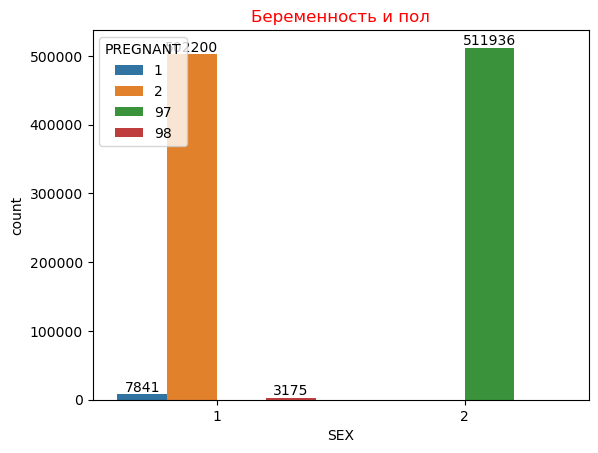

In [168]:
plt.figure()
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Беременность и пол",color="red");

* Мы видим, что все значения "97" относятся к мужчинам, а мужчины не могут быть беременными, поэтому мы преобразуем 97 в 2.

In [169]:
# Процесс преобразования в соответствии с приведенным выше выводом
df.PREGNANT = df.PREGNANT.replace(97,2)

# Избавление от пропущенных значений
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

### Анализ пропущенных значений "INTUBED" 

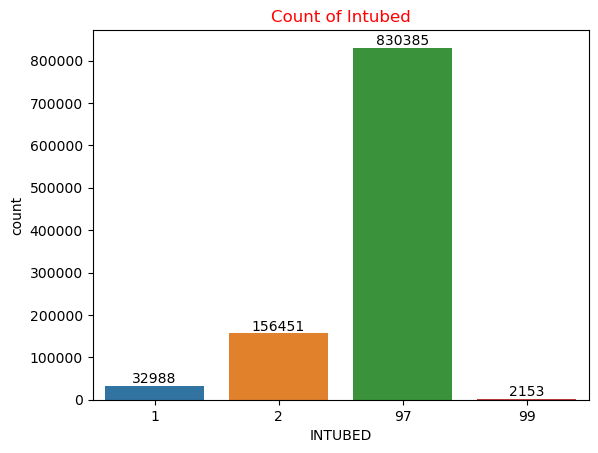

In [170]:
ax = sns.countplot(df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed",color="red");

### Анализ недостающих значений "ICU" 

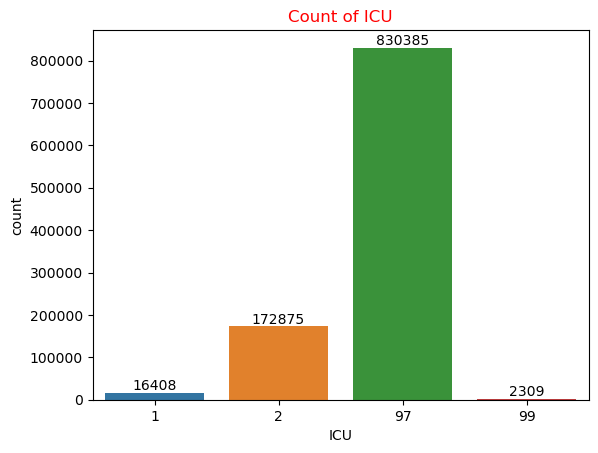

In [171]:
ax = sns.countplot(df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU",color="red");

### Удаление столбцов
* В столбцах "INTUBED" и "ICU" слишком много пропущенных значений, поэтому я их удалю. Также нам больше не нужен столбец "DATE_DIED", потому что мы использовали этот столбец как "death".

In [172]:
df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

### Количество уникальных значений по столбцам

In [173]:
for i in df.columns:
    print(i,":",len(df[i].unique()))

USMER : 2
MEDICAL_UNIT : 13
SEX : 2
PATIENT_TYPE : 2
PNEUMONIA : 2
AGE : 121
PREGNANT : 2
DIABETES : 2
COPD : 2
ASTHMA : 2
INMSUPR : 2
HIPERTENSION : 2
OTHER_DISEASE : 2
CARDIOVASCULAR : 2
OBESITY : 2
RENAL_CHRONIC : 2
TOBACCO : 2
CLASIFFICATION_FINAL : 7
DEATH : 2


* Как мы видим, у нас есть только один числовой признак, который называется "ВОЗРАСТ", остальные являются категориальными.

# Визуализация данных

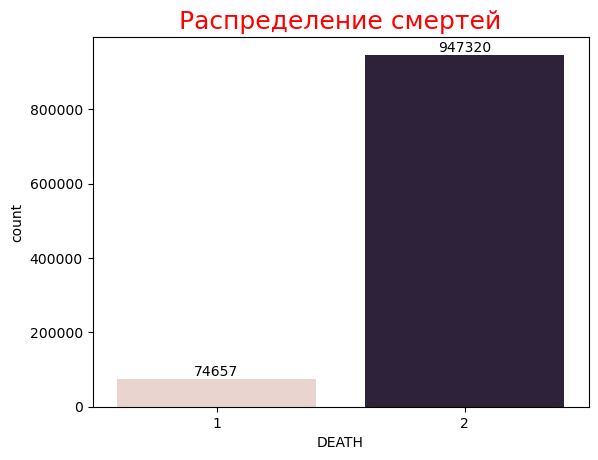

In [174]:
ax = sns.countplot(df.DEATH,palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Распределение смертей", fontsize=18,color="red");

* Значения в целевом столбце распределены несбалансированно. Это, вероятно, приведет к возникновению проблемы с дисбалансом. Тем не менее, я отобразил эту проблему.

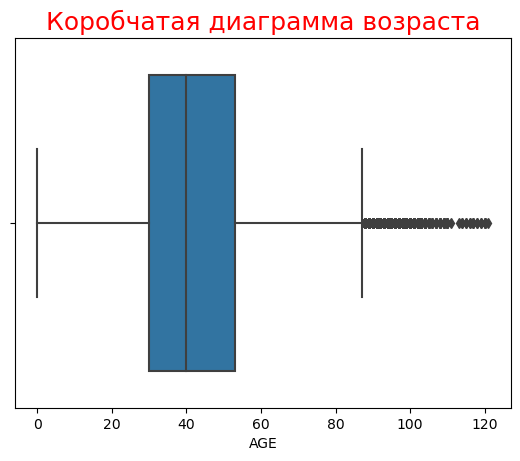

In [175]:
sns.boxplot(x=df['AGE'])
plt.title("Коробчатая диаграмма возраста", color="red", fontsize=18)
plt.show()



* Возраст пациентов примерно от 20 до 60 лет.

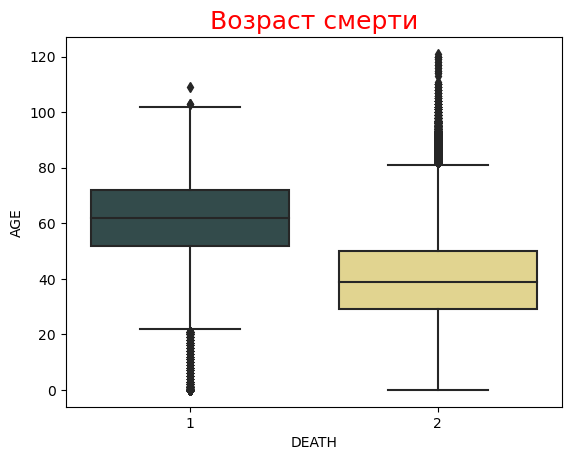

In [176]:
sns.boxplot(x="DEATH", y="AGE",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Возраст смерти",fontsize=18, color="red");

* Пожилые пациенты с большей вероятностью умрут по сравнению с молодыми.

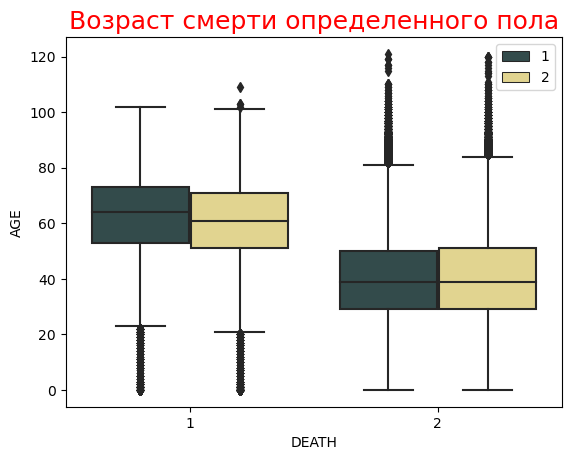

In [177]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Возраст смерти определенного пола",fontsize=18, color="red")
plt.legend(loc="best");

* Пожилые пациенты имеют больше шансов умереть по сравнению с молодыми.
* Нет серьезных различий между мужчинами и женщинами с точки зрения среднего числа пациентов.

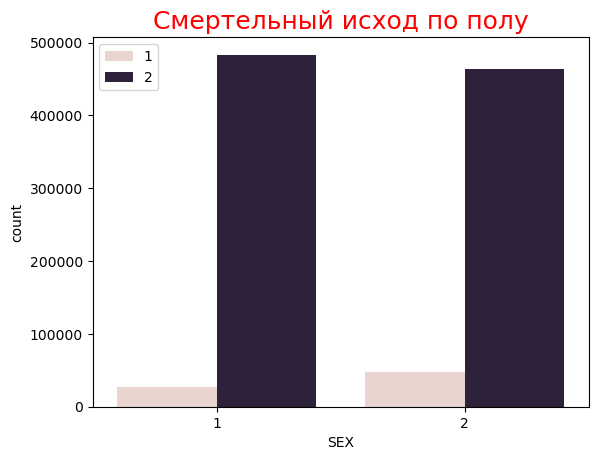

In [178]:
sns.countplot(df.SEX,hue=df.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Смертельный исход по полу",fontsize=18, color="red")
plt.legend(loc="best");

* Мужчины чаще умирают от covid по сравнению с женщинами.

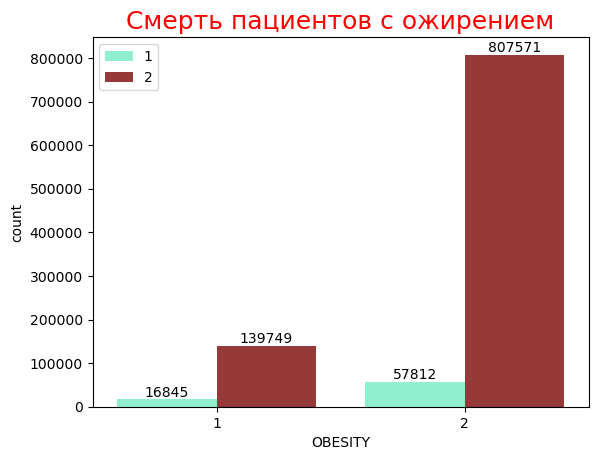

In [179]:
ax=sns.countplot(df.OBESITY,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Смерть пациентов с ожирением",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

* Пациенты с ожирением чаще умирают от covid по сравнению с пациентами, не страдающими ожирением.

## Кореляция между признаками

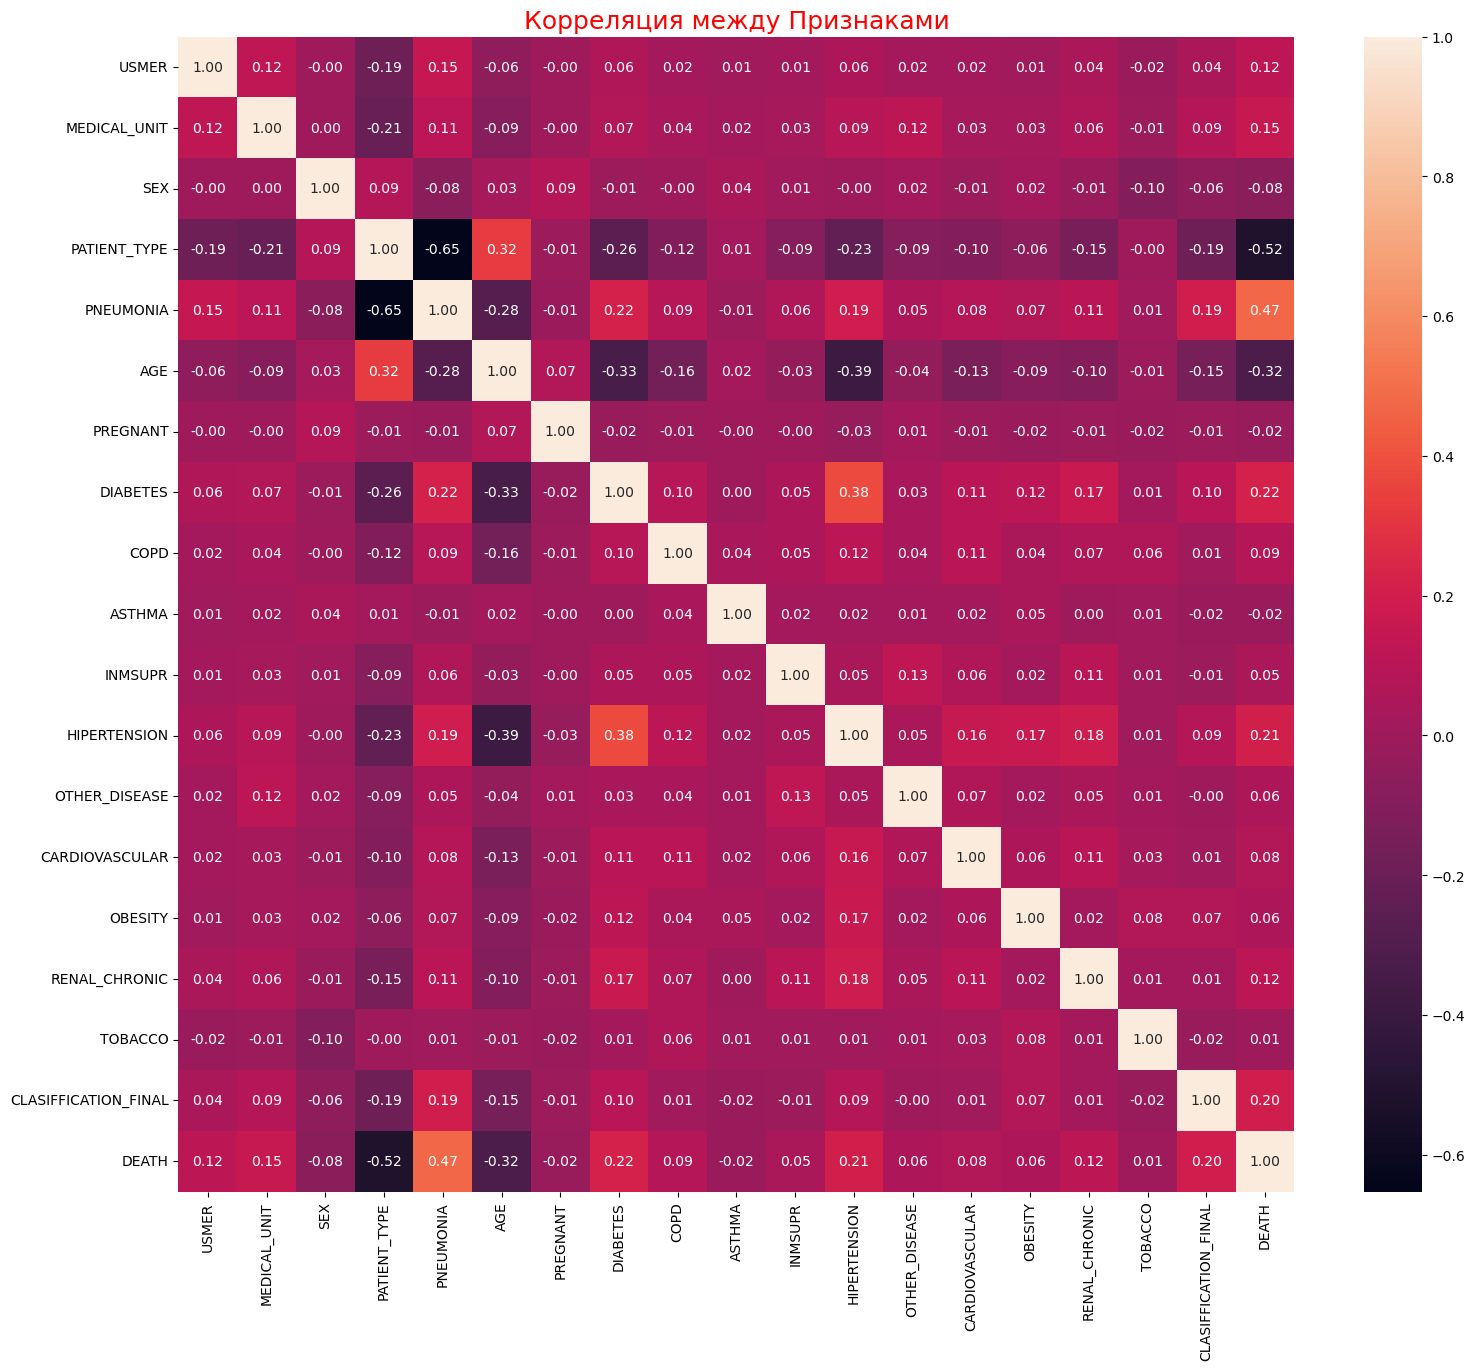

In [180]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Корреляция между Признаками",fontsize=18,color="red");

# Выбор признаков
* Я удалю функции, которые имеют низкую корреляцию с признаком "death".

In [181]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

In [182]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


### Подготовка категориальных объектов, которые не являются бинарными

In [183]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

### Масштабирование числового признака

In [184]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

### Определение "x" и "y"

In [185]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

# Разделение на Train Test Split

In [186]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 25)
Test_x : (204396, 25)
Train_y : (817581,)
Test_y : (204396,)


# Построение Логистической Регрессии

In [187]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9393872678525998


In [188]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.52008522 0.9676508 ]


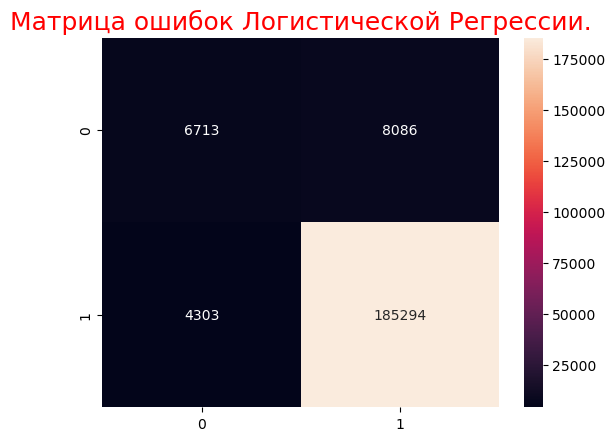

In [189]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Матрица ошибок Логистической Регрессии.",fontsize=18, color="red");

## Вывод:
* Мы получили хорошую точность с помощью логистической регрессии.
* Но это может ввести нас в заблуждение, поэтому мы должны проверить другие показатели.
* Когда мы смотрим на оценку F1, это говорит о том, что мы хорошо предсказываем смертность пациентов.
* То же самое мы видим, когда проверяем матрицу путаницы. Эта проблема основана на наборе данных о дисбалансе, о котором я упоминал.

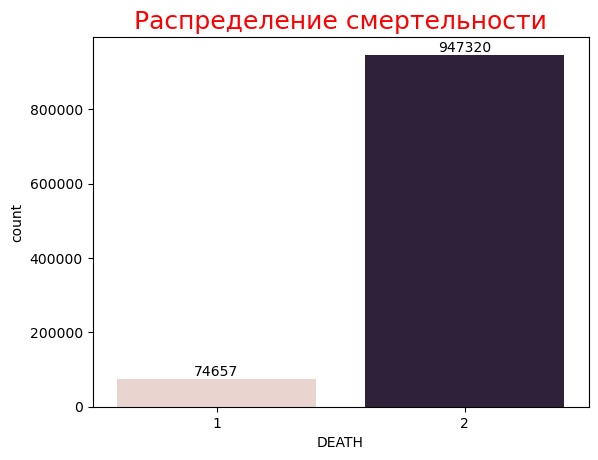

In [190]:
ax = sns.countplot(df.DEATH, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Распределение смертельности", fontsize=18,color="red");

#  Как решить проблему с несбалансированным набором данных
*  Загрузка Большего количества данных
* Изменение Показателей производительности
* Выборка (недостаточная или Избыточная)
* Изменение Алгоритма
* Исправленные Модели и т.д.

#### В этом случае я собираюсь использовать неполную выборку, потому что у нас и так слишком много пациентов.
* Неполная выборка: неполная выборка - это метод, позволяющий сбалансировать неравномерные наборы данных, сохраняя все данные в классе меньшинства и уменьшая размер класса большинства. 
* Если мы используем избыточную выборку, то количество строк увеличится, так что это слишком много строк для компьютера.
* Если я не смогу решить проблему с недостаточной выборкой, я буду использовать другие.

In [191]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)


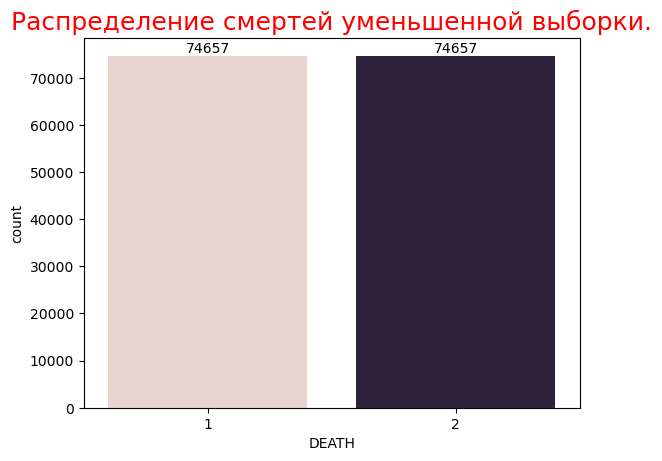

In [192]:
ax = sns.countplot(y_resampled, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Распределение смертей уменьшенной выборки.", fontsize=18,color="red");

# Train Test Split уменьшенной выборки

In [193]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (119451, 25)
Test_x : (29863, 25)
Train_y : (119451,)
Test_y : (29863,)


# Логистическая регрессия после уменьшенной выборки

In [194]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9051669289756555


In [195]:
print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.9061568  0.90415595]


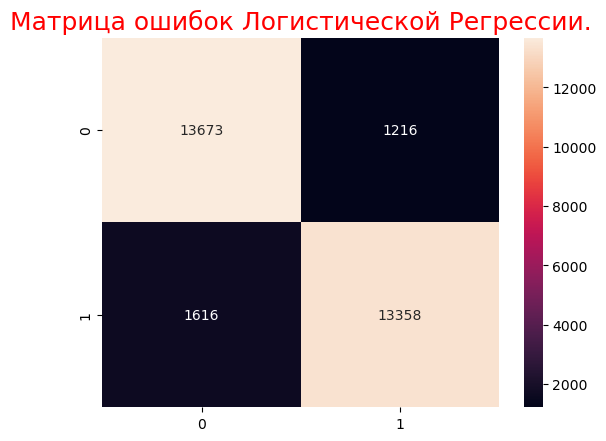

In [196]:
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Матрица ошибок Логистической Регрессии.",fontsize=18, color="red");

* Мы решили проблему с недостаточной выборкой. Мы также могли бы использовать избыточную выборку и, вероятно, получили бы лучшую точность, но я думаю, что это было бы слишком утомительно для компьютера.

## Кривая логистической регрессии

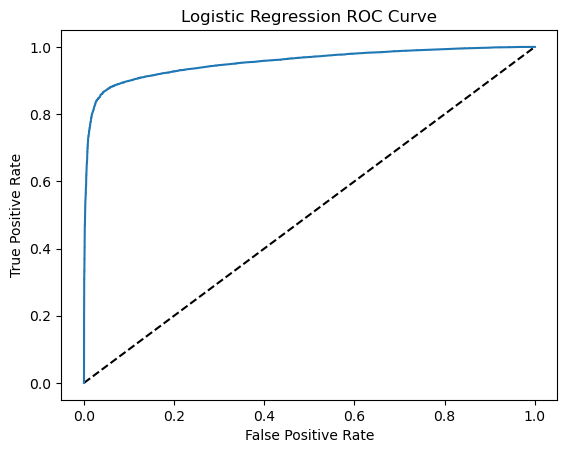

In [197]:
from sklearn.metrics import roc_curve
test_y = test_y.replace({2:1,1:0})
# Вероятности
logreg_pred_proba = logreg.predict_proba(test_x)

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

# Заключение
* В этом проекте я предсказал смертельность от Covid19 с точностью до 90%.
* Я использовал только один алгоритм логистической регрессии.
* Важным моментом в этом проекте было решение проблемы несбалансированного набора данных. Я решил это с помощью метода недостаточной выборки.